In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
!pip install --upgrade pandas

In [3]:
!pip install --upgrade pandas-datareader

In [4]:
df = DataReader('AAPL', data_source='yahoo', start='2020-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096451
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612915
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081
...,...,...,...,...,...,...
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,139.139999
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,141.110001
2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,142.000000


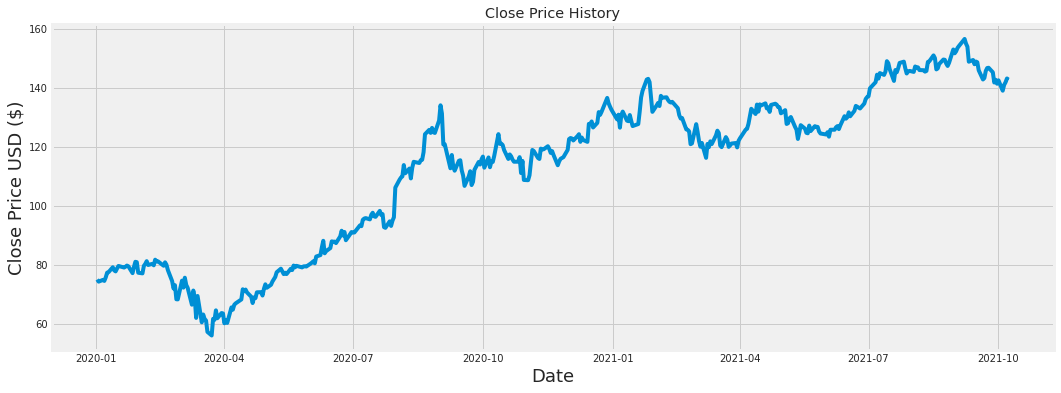

In [5]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

358

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18882181],
       [0.18156514],
       [0.18745493],
       [0.18395094],
       [0.19587963],
       [0.21188401],
       [0.21362357],
       [0.23010013],
       [0.21946369],
       [0.2161336 ],
       [0.22582567],
       [0.2344989 ],
       [0.22913096],
       [0.2319392 ],
       [0.23574148],
       [0.2334551 ],
       [0.21019413],
       [0.23191432],
       [0.24844056],
       [0.24727254],
       [0.2115858 ],
       [0.20947341],
       [0.23479711],
       [0.24125851],
       [0.25060263],
       [0.23772957],
       [0.24150697],
       [0.23668577],
       [0.25554813],
       [0.24975769],
       [0.24995654],
       [0.23516986],
       [0.24665125],
       [0.23840053],
       [0.22038318],
       [0.183429  ],
       [0.15832896],
       [0.16968612],
       [0.12214516],
       [0.12174753],
       [0.18499466],
       [0.1614106 ],
       [0.19476128],
       [0.17035716],
       [0.16068988],
       [0.10387936],
       [0.15151967],
       [0.126

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.18882181, 0.18156514, 0.18745493, 0.18395094, 0.19587963,
       0.21188401, 0.21362357, 0.23010013, 0.21946369, 0.2161336 ,
       0.22582567, 0.2344989 , 0.22913096, 0.2319392 , 0.23574148,
       0.2334551 , 0.21019413, 0.23191432, 0.24844056, 0.24727254,
       0.2115858 , 0.20947341, 0.23479711, 0.24125851, 0.25060263,
       0.23772957, 0.24150697, 0.23668577, 0.25554813, 0.24975769,
       0.24995654, 0.23516986, 0.24665125, 0.23840053, 0.22038318,
       0.183429  , 0.15832896, 0.16968612, 0.12214516, 0.12174753,
       0.18499466, 0.1614106 , 0.19476128, 0.17035716, 0.16068988,
       0.10387936, 0.15151967, 0.12689181, 0.05929571, 0.13320412,
       0.04433512, 0.07080197, 0.05541888, 0.05072194, 0.01210271,
       0.        , 0.05594078, 0.05256097, 0.08466912, 0.05807801])]
[0.07564800649439885]

[array([0.18882181, 0.18156514, 0.18745493, 0.18395094, 0.19587963,
       0.21188401, 0.21362357, 0.23010013, 0.21946369, 0.2161336 ,
       0.22582567, 0.2344989 , 0.22

In [9]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

298/298 [==============================] - 14s 35ms/step - loss: 0.0072


In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [12]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.03669450227596

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


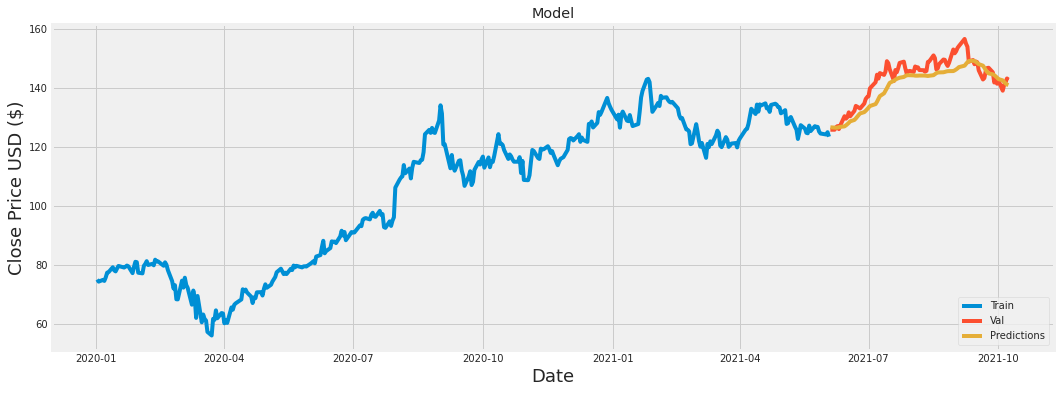

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-04,125.889999,126.720810
2021-06-07,125.900002,126.611504
2021-06-08,126.739998,126.571075
2021-06-09,127.129997,126.621765
2021-06-10,126.110001,126.749161
...,...,...
2021-10-04,139.139999,142.642517
2021-10-05,141.110001,142.100800
2021-10-06,142.000000,141.615860
